In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

Importação dos csv's para Dataframe

In [2]:
dim_regiao = pd.read_csv(
    "data/dim_regiao.csv",
    delimiter=";",
    encoding="UTF-8")

dim_empreendimentos = pd.read_csv(
    "data/dim_empreendimento.csv",
    delimiter=";",
    encoding="UTF-8")

fato_dados_metereologicos = pd.read_csv(
    "data/fato_dados_meteorologicos.csv",
    delimiter=";",
    encoding="UTF-8")

fato_geracao = pd.read_csv(
    "data/fato_geracao.csv",
    delimiter=";",
    encoding="UTF-8",
    decimal=',')

Remoção de caracteres desnecessários no campo de Municípios no DF de empreendimentos.
Usando o método de split junto com stip para selecionar o que deve ser excluído.

In [3]:
dim_empreendimentos['DscMuninicpios'] = dim_empreendimentos['DscMuninicpios'].apply(lambda x: str(x).split('-')[0].strip())
dim_empreendimentos['DscMuninicpios']

0               Nova Lima
1               Nova Lima
2               Nova Lima
3         Bento Gonçalves
4        Floriano Peixoto
               ...       
24595              Manaus
24596              Manaus
24597              Goiana
24598             Goioerê
24599           Cariacica
Name: DscMuninicpios, Length: 24600, dtype: object

Merge dos df de empreendimentos usando os id previamente feitos na c2.
Também foi feita a exclusão de um campo desnecessário para a análise (Data de quando foi obtido os dados de clima).

In [4]:
empreendimentos_combinados = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')

empreendimentos_combinados = empreendimentos_combinados.drop('DatGeracaoConjuntoDados', axis=1)

empreendimentos_combinados.head()

,id_x,MdaPotenciaFiscalizadaKw,MdaPotenciaOutorgadaKw,Id_empreendimento,id_y,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,NomFonteCombustivel,DscMuninicpios
0,0,1400,1400.0,0,0,E,MG,PCH,Potencial hidráulico,Nova Lima
1,1,3972,3972.0,1,1,F,MG,PCH,Potencial hidráulico,Nova Lima
2,2,1440,1440.0,2,2,G,MG,PCH,Potencial hidráulico,Nova Lima
3,3,100000,100000.0,3,3,14 de Julho,RS,UHE,Potencial hidráulico,Bento Gonçalves
4,4,720,720.0,4,4,Abaúna,RS,CGH,Potencial hidráulico,Floriano Peixoto


In [5]:
dim_regiao.head()

,id,UF,latitude,longitude,altitude,cidade
0,0,MT,-14.421389,-54.036111,"476,91",Paranatinga
1,1,BA,-14.208056,-42.749722,"552,23",Guanambi
2,2,CE,-5.186667,-40.672222,"298,19",Crateús
3,3,PA,-3.864167,-54.216389,"100,45",Placas
4,4,MG,-21.228333,-43.767778,"1168,76",Barbacena


Tratamento dos dados climáticos para serem transformadoos em float. (De ,2 para 0.2 ou de 1,2 para 1.2)

In [6]:
dados_combinados = pd.merge(fato_dados_metereologicos, dim_regiao[['id', 'UF','cidade']], left_on='id_regiao', right_on='id')

dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].astype(str)
dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].str.replace(',', '.')
dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].astype(float)

dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].astype(str)
dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].str.replace(',', '.')
dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].astype(float)

dados_combinados['tempAr'] = dados_combinados['tempAr'].astype(str)
dados_combinados['tempAr'] = dados_combinados['tempAr'].str.replace(',', '.')
dados_combinados['tempAr'] = dados_combinados['tempAr'].astype(float)

dados_combinados['radGlobal'] = dados_combinados['radGlobal'].astype(str)
dados_combinados['radGlobal'] = dados_combinados['radGlobal'].str.replace(',', '.')
dados_combinados['radGlobal'] = dados_combinados['radGlobal'].astype(float)

Obtendo um sample, pela massiva quantidade de dados.

In [7]:
sample_dados_combinados = dados_combinados.sample(frac=0.2, random_state=42)
sample_dados_combinados

,id_x,precipTotalHorario,ventoVeloHoraria,tempAr,radGlobal,umidRelAr,id_regiao,timestamp,id_y,UF,cidade
915995,915995,0.029738,4.500000,25.4,231.900000,0.0,147,2022-07-14 20:00:00,147,PB,Mamanguape
859452,859452,0.000000,1.300000,20.2,1371.112837,83.0,136,2022-08-23 23:00:00,136,ES,Vila Velha
1804653,1804653,0.000000,2.239241,23.5,1404.817852,81.0,299,2022-02-03 02:00:00,299,RO,Vilhena
1908538,1908538,9.800000,1.500000,20.4,1452.793701,91.0,316,2022-03-13 00:00:00,316,MG,Uberlândia
3163682,3163682,0.000000,0.900000,20.3,957.632783,72.0,517,2022-07-19 02:00:00,517,MT,Campo Novo do Parecis
...,...,...,...,...,...,...,...,...,...,...,...
3138866,3138866,0.000000,4.949485,24.4,31.500000,72.0,513,2022-03-02 10:00:00,513,RS,Tramandaí
391474,391474,0.638602,7.543456,18.3,769.971718,100.0,60,2022-03-02 15:00:00,60,SC,Bom Jardim da Serra
3205462,3205462,0.000000,3.200000,14.2,1550.421722,81.0,524,2022-08-31 07:00:00,524,DF,Paranoá
2890480,2890480,0.000000,1.500000,22.7,1.100000,96.0,472,2022-12-06 08:00:00,472,SC,Itapoá


Juntando os 2 dataframes pelas cidades.

In [8]:
df_final = pd.merge(sample_dados_combinados, empreendimentos_combinados, left_on='cidade', right_on='DscMuninicpios')


df_final

,id_x_x,precipTotalHorario,ventoVeloHoraria,tempAr,radGlobal,umidRelAr,id_regiao,timestamp,id_y_x,UF,...,id_x_y,MdaPotenciaFiscalizadaKw,MdaPotenciaOutorgadaKw,Id_empreendimento,id_y_y,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,NomFonteCombustivel,DscMuninicpios
0,915995,0.029738,4.500000,25.4,231.900000,0.000000,147,2022-07-14 20:00:00,147,PB,...,5049,19200,19200.0,5049,5049,Monte Alegre,PB,UTE,Bagaço de Cana de Açúcar,Mamanguape
1,916283,0.029738,2.000000,24.4,336.100000,0.000000,147,2022-07-26 20:00:00,147,PB,...,5049,19200,19200.0,5049,5049,Monte Alegre,PB,UTE,Bagaço de Cana de Açúcar,Mamanguape
2,912449,0.000000,0.000000,23.7,1540.579806,0.000000,147,2022-02-17 02:00:00,147,PB,...,5049,19200,19200.0,5049,5049,Monte Alegre,PB,UTE,Bagaço de Cana de Açúcar,Mamanguape
3,913993,0.029738,0.000000,23.5,231.100000,0.000000,147,2022-04-22 10:00:00,147,PB,...,5049,19200,19200.0,5049,5049,Monte Alegre,PB,UTE,Bagaço de Cana de Açúcar,Mamanguape
4,918421,0.000000,0.000000,24.6,1540.579806,0.000000,147,2022-10-23 22:00:00,147,PB,...,5049,19200,19200.0,5049,5049,Monte Alegre,PB,UTE,Bagaço de Cana de Açúcar,Mamanguape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12439084,3337128,0.000000,7.620134,21.9,1303.839474,76.960396,552,2022-08-25 04:00:00,552,RN,...,8561,0,31500.0,8561,8561,EVI 2,RN,EOL,Cinética do vento,Touros
12439085,3337128,0.000000,7.620134,21.9,1303.839474,76.960396,552,2022-08-25 04:00:00,552,RN,...,8563,0,27000.0,8563,8563,EVII 2,RN,EOL,Cinética do vento,Touros
12439086,3337128,0.000000,7.620134,21.9,1303.839474,76.960396,552,2022-08-25 04:00:00,552,RN,...,10115,0,10000.0,10115,10115,Aventura Solar,RN,UFV,Radiação solar,Touros
12439087,3337128,0.000000,7.620134,21.9,1303.839474,76.960396,552,2022-08-25 04:00:00,552,RN,...,11702,0,31500.0,11702,11702,Pedra de Amolar I,RN,EOL,Cinética do vento,Touros


Definindo as variaveis de treinamento X e Y com as colunas a serem utilizadas. Realizando o treinamento utilizando dtc.fit e criando variavel de predição para comparar nos resultados futuros.

In [9]:
X = df_final[['MdaPotenciaOutorgadaKw', 'precipTotalHorario', 'ventoVeloHoraria', 'tempAr', 'radGlobal', 'umidRelAr']]
y = df_final['SigTipoGeracao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtc = DecisionTreeClassifier(max_depth=15)


dtc_fit = dtc.fit(X_train, y_train)


y_pred = dtc.predict(X_test)

Realizando a analise de precisão e report do nivel da precisão do modelo treinado

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

print("Precisão:", accuracy)
print("Precisão:", precision)
print("Análise:\n", report)

Precisão: 0.9690708886260972
Precisão: 0.9689335128717566
Análise:
               precision    recall  f1-score   support

         CGH       0.88      0.47      0.61     51928
         EOL       0.92      0.78      0.84     23556
         PCH       0.85      0.66      0.74     34697
         UFV       0.99      0.99      0.99   1776137
         UHE       0.96      0.79      0.87     14418
         UTE       0.91      0.98      0.95    586029
         UTN       1.00      1.00      1.00      1053

    accuracy                           0.97   2487818
   macro avg       0.93      0.81      0.86   2487818
weighted avg       0.97      0.97      0.97   2487818



Convertendo valores de rótulos verdadeiros de treinamento para codificação binária para ser utilizada na geração da curva ROC

In [11]:
# Codificação one-hot dos rótulos verdadeiros
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_true_encoded = label_binarizer.transform(y_test)

print("Rótulos verdadeiros:")
print(y_test)

print("\nRótulos verdadeiros codificados:")
print(y_true_encoded)

label_binarizer.transform(["UFV"])

Rótulos verdadeiros:
1121199     UFV
8087555     UFV
310636      UTE
11487194    UFV
6485151     UFV
           ... 
9314107     UFV
1235165     UTE
1941944     UFV
9759046     UFV
5332089     UFV
Name: SigTipoGeracao, Length: 2487818, dtype: object

Rótulos verdadeiros codificados:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[0, 0, 0, 1, 0, 0, 0]])

Curva roc para CGH (Central Geradora Hidroelétrica)

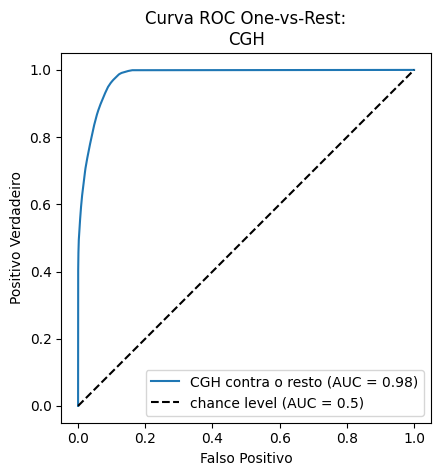

In [12]:
class_of_interest = "CGH"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nCGH")
plt.legend()
plt.show()

Curva roc para UHE (Usina Hidroelétrica)

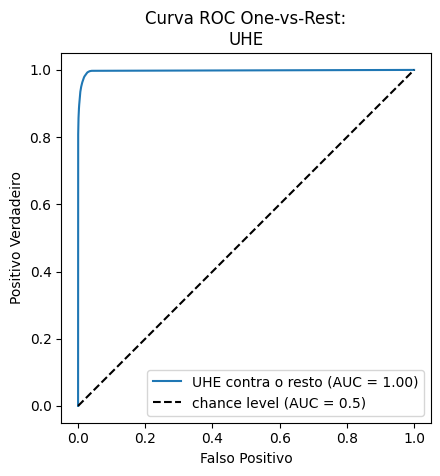

In [21]:
class_of_interest = "UHE"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nUHE")
plt.legend()
plt.show()

Curva roc para EOL (Usina Eolica)

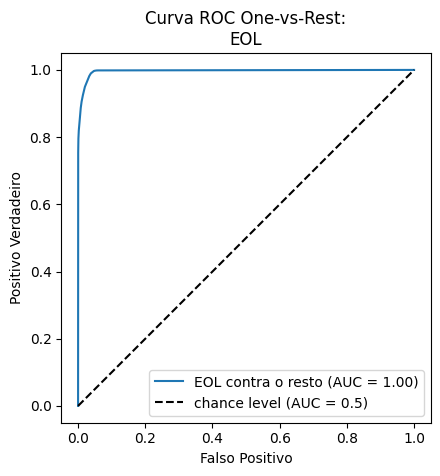

In [16]:
class_of_interest = "EOL"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nEOL")
plt.legend()
plt.show()

Curva roc para PCH (Pequena Central Hidroelétrica)

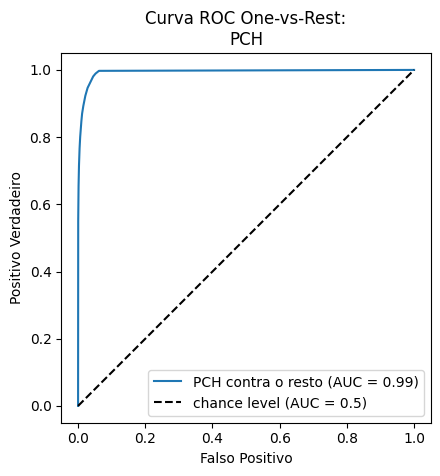

In [17]:
class_of_interest = "PCH"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nPCH")
plt.legend()
plt.show()

Curva roc para UFV (Usina Foto Voltaica)

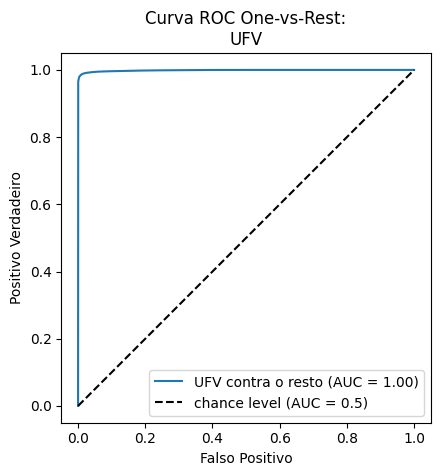

In [18]:
class_of_interest = "UFV"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nUFV")
plt.legend()
plt.show()

Curva roc para UTE (Usina Termoeletrica)

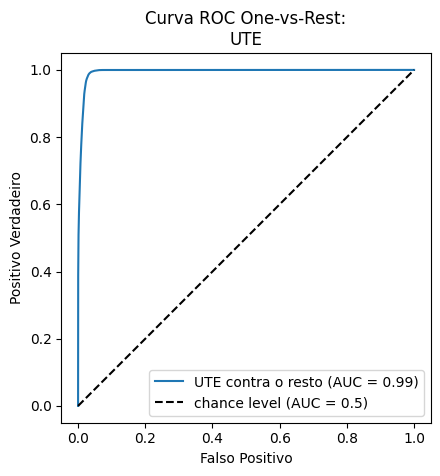

In [19]:
class_of_interest = "UTE"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nUTE")
plt.legend()
plt.show()

Curva roc para UTN (Usina Termo Nuclear)

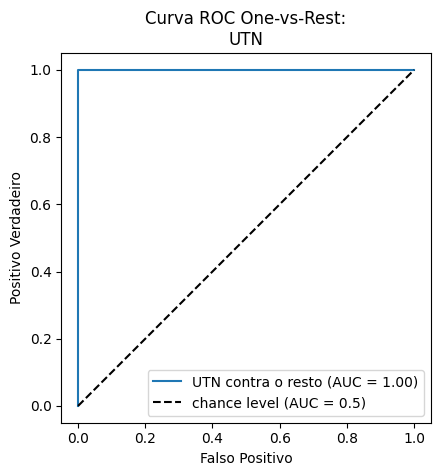

In [20]:
class_of_interest = "UTN"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_true_encoded[:, class_id],
    dtc_fit.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} contra o resto",
    # color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Falso Positivo")
plt.ylabel("Positivo Verdadeiro")
plt.title("Curva ROC One-vs-Rest:\nUTN")
plt.legend()
plt.show()